In [1]:
import netCDF4 as nc
import numpy as np
from matplotlib import pyplot as plt
import os
import json
import pandas as pd
import seaborn as sns
import xarray as xr

In [2]:
cell_y_coord=3
cell_x_coord=0

In [3]:
birch_dir='/data/workflows/BONA-birch/output/'
black_spruce_dir='/data/workflows/BONA-black-spruce/output/'

gpp_tr='GPP_monthly_tr.nc'
gpp_sc='GPP_monthly_sc.nc'

npp_tr='NPP_monthly_tr.nc'
npp_sc='NPP_monthly_sc.nc'

rm_tr='RM_monthly_tr.nc'
rm_sc='RM_monthly_sc.nc'

rg_tr='RG_monthly_tr.nc'
rg_sc='RG_monthly_sc.nc'

rh_tr='RH_monthly_tr.nc'
rh_sc='RH_monthly_sc.nc'

ald_tr='ALD_yearly_tr.nc'
ald_sc='ALD_yearly_sc.nc'

lwclayer_tr = 'LWCLAYER_monthly_tr.nc'
lwclayer_sc = 'LWCLAYER_monthly_sc.nc'

tlayer_tr = 'TLAYER_monthly_tr.nc'
tlayer_sc = 'TLAYER_monthly_sc.nc'

vegc_tr = 'VEGC_monthly_tr.nc'
vegc_sc = 'VEGC_monthly_sc.nc'
vegc_eq = 'VEGC_monthly_eq.nc'

lai_tr = 'LAI_monthly_tr.nc'

transpiration_tr = 'TRANSPIRATION_monthly_tr.nc'
eet_tr = 'EET_monthly_tr.nc'

ltrfalc_tr = 'LTRFALC_monthly_tr.nc'
shlwc_tr = 'SHLWC_monthly_tr.nc'
shlwc_eq = 'SHLWC_monthly_eq.nc'
deepc_eq = 'DEEPC_yearly_eq.nc'

In [4]:
#GPP
gpp_bs_tr = xr.open_dataset(black_spruce_dir+gpp_tr)
tr_dates = gpp_bs_tr.indexes['time'].to_datetimeindex()
gpp_bs_tr = gpp_bs_tr.convert_calendar('standard', use_cftime=True, align_on='date')
gpp_bs_tr = gpp_bs_tr.variables['GPP'][:, cell_y_coord, cell_x_coord]

gpp_bs_sc = xr.open_dataset(black_spruce_dir+gpp_sc)
sc_dates = gpp_bs_sc.indexes['time'].to_datetimeindex()
gpp_bs_sc = gpp_bs_sc.convert_calendar('standard', use_cftime=True, align_on='date')
gpp_bs_sc = gpp_bs_sc.variables['GPP'][:, cell_y_coord, cell_x_coord]

#NPP
npp_bs_tr = xr.open_dataset(black_spruce_dir+npp_tr)
npp_bs_tr = npp_bs_tr.convert_calendar('standard', use_cftime=True, align_on='date')
npp_bs_tr = npp_bs_tr.variables['NPP'][:, cell_y_coord, cell_x_coord]

npp_bs_sc = xr.open_dataset(black_spruce_dir+npp_sc)
npp_bs_sc = npp_bs_sc.convert_calendar('standard', use_cftime=True, align_on='date')
npp_bs_sc = npp_bs_sc.variables['NPP'][:, cell_y_coord, cell_x_coord]

#ALD
ald_bs_tr = xr.open_dataset(black_spruce_dir+ald_tr)
ald_bs_tr = ald_bs_tr.convert_calendar('standard', use_cftime=True, align_on='date')
ald_bs_tr = ald_bs_tr.variables['ALD'][:, cell_y_coord, cell_x_coord]

ald_bs_sc = xr.open_dataset(black_spruce_dir+ald_sc)
ald_bs_sc = ald_bs_sc.convert_calendar('standard', use_cftime=True, align_on='date')
ald_bs_sc = ald_bs_sc.variables['ALD'][:, cell_y_coord, cell_x_coord]

#RM
rm_bs_tr = xr.open_dataset(black_spruce_dir+rm_tr)
rm_bs_tr = rm_bs_tr.convert_calendar('standard', use_cftime=True, align_on='date')
rm_bs_tr = rm_bs_tr.variables['RM'][:, :, :5, cell_y_coord, cell_x_coord]

rm_bs_sc = xr.open_dataset(black_spruce_dir+rm_sc)
rm_bs_sc = rm_bs_sc.convert_calendar('standard', use_cftime=True, align_on='date')
rm_bs_sc = rm_bs_sc.variables['RM'][:, :, :5, cell_y_coord, cell_x_coord]

#RG
rg_bs_tr = xr.open_dataset(black_spruce_dir+rg_tr)
rg_bs_tr = rg_bs_tr.convert_calendar('standard', use_cftime=True, align_on='date')
rg_bs_tr = rg_bs_tr.variables['RG'][:, :, :5, cell_y_coord, cell_x_coord]

rg_bs_sc = xr.open_dataset(black_spruce_dir+rg_sc)
rg_bs_sc = rg_bs_sc.convert_calendar('standard', use_cftime=True, align_on='date')
rg_bs_sc = rg_bs_sc.variables['RG'][:, :, :5, cell_y_coord, cell_x_coord]

#RH
rh_bs_tr_layer = xr.open_dataset(black_spruce_dir+rh_tr)
rh_bs_tr_layer = rh_bs_tr_layer.convert_calendar('standard', use_cftime=True, align_on='date')
rh_bs_tr_layer = rh_bs_tr_layer.variables['RH'][:, :, cell_y_coord, cell_x_coord]
rh_bs_tr = rh_bs_tr_layer.sum(axis=1)

rh_bs_sc_layer = xr.open_dataset(black_spruce_dir+rh_sc)
rh_bs_sc_layer = rh_bs_sc_layer.convert_calendar('standard', use_cftime=True, align_on='date')
rh_bs_sc_layer = rh_bs_sc_layer.variables['RH'][:, :, cell_y_coord, cell_x_coord]
rh_bs_sc = rh_bs_sc_layer.sum(axis=1)

#LWCLAYER
lwclayer_bs_tr = xr.open_dataset(black_spruce_dir+lwclayer_tr)
lwclayer_bs_tr = lwclayer_bs_tr.convert_calendar('standard', use_cftime=True, align_on='date')
lwclayer_bs_tr = lwclayer_bs_tr.variables['LWCLAYER'][:,:, cell_y_coord, cell_x_coord]

lwclayer_bs_sc = xr.open_dataset(black_spruce_dir+lwclayer_sc)
lwclayer_bs_sc = lwclayer_bs_sc.convert_calendar('standard', use_cftime=True, align_on='date')
lwclayer_bs_sc = lwclayer_bs_sc.variables['LWCLAYER'][:,:, cell_y_coord, cell_x_coord]

#TLAYER
tlayer_bs_tr = xr.open_dataset(black_spruce_dir+tlayer_tr)
tlayer_bs_tr = tlayer_bs_tr.convert_calendar('standard', use_cftime=True, align_on='date')
tlayer_bs_tr = tlayer_bs_tr.variables['TLAYER'][:,:,cell_y_coord, cell_x_coord]

tlayer_bs_sc = xr.open_dataset(black_spruce_dir+tlayer_sc)
tlayer_bs_sc = tlayer_bs_sc.convert_calendar('standard', use_cftime=True, align_on='date')
tlayer_bs_sc = tlayer_bs_sc.variables['TLAYER'][:,:,cell_y_coord, cell_x_coord]

#VEGC
vegc_bs_eq = xr.open_dataset(black_spruce_dir+vegc_eq)
vegc_bs_eq = vegc_bs_eq.to_dataframe().reset_index()
vegc_bs_eq = vegc_bs_eq.loc[(vegc_bs_eq['y']==cell_y_coord) & (vegc_bs_eq['x']==cell_x_coord) & (vegc_bs_eq['pft']<5)]

vegc_bs_tr = xr.open_dataset(black_spruce_dir+vegc_tr)
vegc_bs_tr = vegc_bs_tr.convert_calendar('standard', use_cftime=False, align_on='date')
vegc_bs_tr = vegc_bs_tr.to_dataframe().reset_index()
vegc_bs_tr = vegc_bs_tr.loc[(vegc_bs_tr['y']==cell_y_coord) & (vegc_bs_tr['x']==cell_x_coord) & (vegc_bs_tr['pft']<5)]

#LAI
lai_bs_tr = xr.open_dataset(black_spruce_dir+lai_tr)
lai_bs_tr = lai_bs_tr.convert_calendar('standard', use_cftime=True, align_on='date')
lai_bs_tr = lai_bs_tr.variables['LAI'][:, :5, cell_y_coord, cell_x_coord]
lai_bs_tr_sum = lai_bs_tr.sum(axis=1)

#TRANSPIRATION
transpiration_bs_tr = xr.open_dataset(black_spruce_dir+transpiration_tr)
transpiration_bs_tr = transpiration_bs_tr.convert_calendar('standard', use_cftime=False, align_on='date')
transpiration_bs_tr = transpiration_bs_tr.variables['TRANSPIRATION'][:, cell_y_coord, cell_x_coord]

#EET
eet_bs_tr = xr.open_dataset(black_spruce_dir+eet_tr)
eet_bs_tr = eet_bs_tr.convert_calendar('standard', use_cftime=False, align_on='date')
eet_bs_tr = eet_bs_tr.variables['EET'][:, cell_y_coord, cell_x_coord]

#LTRFALC
ltrfalc_bs_tr = xr.open_dataset(black_spruce_dir+ltrfalc_tr)
ltrfalc_bs_tr = ltrfalc_bs_tr.convert_calendar('standard', use_cftime=False, align_on='date')
ltrfalc_bs_tr = ltrfalc_bs_tr.to_dataframe().reset_index()
ltrfalc_bs_tr = ltrfalc_bs_tr.loc[(ltrfalc_bs_tr['y']==cell_y_coord) & (ltrfalc_bs_tr['x']==cell_x_coord)]

#SHLWC
shlwc_bs_tr = xr.open_dataset(black_spruce_dir+shlwc_tr)
shlwc_bs_tr = shlwc_bs_tr.convert_calendar('standard', use_cftime=False, align_on='date')
shlwc_bs_tr = shlwc_bs_tr.to_dataframe().reset_index()
shlwc_bs_tr = shlwc_bs_tr.loc[(shlwc_bs_tr['y']==cell_y_coord) & (shlwc_bs_tr['x']==cell_x_coord)]

shlwc_bs_eq = xr.open_dataset(black_spruce_dir+shlwc_eq)
shlwc_bs_eq = shlwc_bs_eq.to_dataframe().reset_index()
shlwc_bs_eq = shlwc_bs_eq.loc[(shlwc_bs_eq['y']==cell_y_coord) & (shlwc_bs_eq['x']==cell_x_coord)]

#DEEPC
deepc_bs_eq = xr.open_dataset(black_spruce_dir+deepc_eq)
deepc_bs_eq = deepc_bs_eq.to_dataframe().reset_index()
deepc_bs_eq = deepc_bs_eq.loc[(deepc_bs_eq['y']==cell_y_coord) & (deepc_bs_eq['x']==cell_x_coord)]

/tmp/ipykernel_2080/2863595330.py:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  tr_dates = gpp_bs_tr.indexes['time'].to_datetimeindex()
/tmp/ipykernel_2080/2863595330.py:8: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  sc_dates = gpp_bs_sc.indexes['time'].to_datetimeindex()


In [5]:
xr.open_dataset(black_spruce_dir+rh_tr)

<xarray.Dataset>
Dimensions:                    (time: 1452, layer: 22, y: 4, x: 2)
Coordinates:
  * time                       (time) object 1901-01-01 00:00:00 ... 2021-12-...
Dimensions without coordinates: layer, y, x
Data variables:
    RH                         (time, layer, y, x) float64 ...
    albers_conical_equal_area  |S1 ...
Attributes:
    Git_SHA:  v0.7.0-33-g90901d-dirty

In [6]:
rm_bs_tr_root = rm_bs_tr[:, 2, :].sum(axis=1)
rm_bs_tr = rm_bs_tr.sum(axis=2).sum(axis=1)

rm_bs_sc_root = rm_bs_sc[:, 2, :].sum(axis=1)
rm_bs_sc = rm_bs_sc.sum(axis=2).sum(axis=1)

rg_bs_tr_root = rg_bs_tr[:, 2, :].sum(axis=1)
rg_bs_tr = rg_bs_tr.sum(axis=2).sum(axis=1)

rg_bs_sc_root = rg_bs_sc[:, 2, :].sum(axis=1)
rg_bs_sc = rg_bs_sc.sum(axis=2).sum(axis=1)

In [7]:
rh_bs_tr

<xarray.Variable (time: 1452)>
array([0.00866405, 0.00899138, 0.0106584 , ..., 2.30389337, 0.22401898,
       0.01035495])

In [8]:
df_bs_tr = pd.DataFrame({'date': tr_dates, 'GPP': gpp_bs_tr, 'NPP': npp_bs_tr, 'RG': rg_bs_tr, 'RG_root': rg_bs_tr_root, 'RH': rh_bs_tr, 'RM': rm_bs_tr, 'RM_root': rm_bs_tr_root, 'LWC_top': lwclayer_bs_tr[:,1], 'TLAYER_top': tlayer_bs_tr[:,1], 'EET': eet_bs_tr, 'TRANSPIRATION': transpiration_bs_tr, 'LAI': lai_bs_tr_sum})
#df_bs_sc = pd.DataFrame({'date': sc_dates, 'GPP': gpp_bs_sc, 'NPP': npp_bs_sc, 'RG': rg_bs_sc, 'RH': rh_bs_sc, 'RM': rm_bs_sc, 'LWC_top': lwclayer_bs_sc, 'TLAYER_top': tlayer_bs_sc})
df_bs = pd.concat([df_bs_tr])
df_bs['RECO'] = df_bs['RG'] + df_bs['RM'] + df_bs['RH']
df_bs['NEE'] = df_bs['RECO'] - df_bs['GPP']
df_bs['year'] = df_bs['date'].dt.year
df_bs_yearly = df_bs.groupby(by=['year']).sum()

In [9]:
#GPP
gpp_br_tr = xr.open_dataset(birch_dir+gpp_tr)
tr_dates = gpp_br_tr.indexes['time'].to_datetimeindex()
gpp_br_tr = gpp_br_tr.convert_calendar('standard', use_cftime=True, align_on='date')
gpp_br_tr = gpp_br_tr.variables['GPP'][:, cell_y_coord, cell_x_coord]

gpp_br_sc = xr.open_dataset(birch_dir+gpp_sc)
sc_dates = gpp_br_sc.indexes['time'].to_datetimeindex()
gpp_br_sc = gpp_br_sc.convert_calendar('standard', use_cftime=True, align_on='date')
gpp_br_sc = gpp_br_sc.variables['GPP'][:, cell_y_coord, cell_x_coord]

#NPP
npp_br_tr = xr.open_dataset(birch_dir+npp_tr)
npp_br_tr = npp_br_tr.convert_calendar('standard', use_cftime=True, align_on='date')
npp_br_tr = npp_br_tr.variables['NPP'][:, cell_y_coord, cell_x_coord]

npp_br_sc = xr.open_dataset(birch_dir+npp_sc)
npp_br_sc = npp_br_sc.convert_calendar('standard', use_cftime=True, align_on='date')
npp_br_sc = npp_br_sc.variables['NPP'][:, cell_y_coord, cell_x_coord]

#ALD
ald_br_tr = xr.open_dataset(birch_dir+ald_tr)
ald_br_tr = ald_br_tr.convert_calendar('standard', use_cftime=True, align_on='date')
ald_br_tr = ald_br_tr.variables['ALD'][:, cell_y_coord, cell_x_coord]

ald_br_sc = xr.open_dataset(birch_dir+ald_sc)
ald_br_sc = ald_br_sc.convert_calendar('standard', use_cftime=True, align_on='date')
ald_br_sc = ald_br_sc.variables['ALD'][:, cell_y_coord, cell_x_coord]

#RM
rm_br_tr = xr.open_dataset(birch_dir+rm_tr)
rm_br_tr = rm_br_tr.convert_calendar('standard', use_cftime=True, align_on='date')
rm_br_tr = rm_br_tr.variables['RM'][:, :, :, cell_y_coord, cell_x_coord]

rm_br_sc = xr.open_dataset(birch_dir+rm_sc)
rm_br_sc = rm_br_sc.convert_calendar('standard', use_cftime=True, align_on='date')
rm_br_sc = rm_br_sc.variables['RM'][:, :, :, cell_y_coord, cell_x_coord]

#RG
rg_br_tr = xr.open_dataset(birch_dir+rg_tr)
rg_br_tr = rg_br_tr.convert_calendar('standard', use_cftime=True, align_on='date')
rg_br_tr = rg_br_tr.variables['RG'][:, :, :, cell_y_coord, cell_x_coord]

rg_br_sc = xr.open_dataset(birch_dir+rg_sc)
rg_br_sc = rg_br_sc.convert_calendar('standard', use_cftime=True, align_on='date')
rg_br_sc = rg_br_sc.variables['RG'][:, :, :, cell_y_coord, cell_x_coord]

#RH
rh_br_tr_layer = xr.open_dataset(birch_dir+rh_tr)
rh_br_tr_layer = rh_br_tr_layer.convert_calendar('standard', use_cftime=True, align_on='date')
rh_br_tr_layer = rh_br_tr_layer.variables['RH'][:,:,cell_y_coord, cell_x_coord]
rh_br_tr = rh_br_tr_layer.sum(axis=1)

rh_br_sc_layer = xr.open_dataset(birch_dir+rh_sc)
rh_br_sc_layer = rh_br_sc_layer.convert_calendar('standard', use_cftime=True, align_on='date')
rh_br_sc_layer = rh_br_sc_layer.variables['RH'][:,:,cell_y_coord, cell_x_coord]
rh_br_sc = rh_br_sc_layer.sum(axis=1)

#LWCLAYER
lwclayer_br_tr = xr.open_dataset(birch_dir+lwclayer_tr)
lwclayer_br_tr = lwclayer_br_tr.convert_calendar('standard', use_cftime=True, align_on='date')
lwclayer_br_tr = lwclayer_br_tr.variables['LWCLAYER'][:,:,cell_y_coord, cell_x_coord]

lwclayer_br_sc = xr.open_dataset(birch_dir+lwclayer_sc)
lwclayer_br_sc = lwclayer_br_sc.convert_calendar('standard', use_cftime=True, align_on='date')
lwclayer_br_sc = lwclayer_br_sc.variables['LWCLAYER'][:,:,cell_y_coord, cell_x_coord]

#TLAYER
tlayer_br_tr = xr.open_dataset(birch_dir+tlayer_tr)
tlayer_br_tr = tlayer_br_tr.convert_calendar('standard', use_cftime=True, align_on='date')
tlayer_br_tr = tlayer_br_tr.variables['TLAYER'][:,:,cell_y_coord, cell_x_coord]

tlayer_br_sc = xr.open_dataset(birch_dir+tlayer_sc)
tlayer_br_sc = tlayer_br_sc.convert_calendar('standard', use_cftime=True, align_on='date')
tlayer_br_sc = tlayer_br_sc.variables['TLAYER'][:,:,cell_y_coord, cell_x_coord]

#VEGC
vegc_br_eq = xr.open_dataset(birch_dir+vegc_eq)
vegc_br_eq = vegc_br_eq.to_dataframe().reset_index()
vegc_br_eq = vegc_br_eq.loc[(vegc_br_eq['y']==cell_y_coord) & (vegc_br_eq['x']==cell_x_coord) & (vegc_br_eq['pft']<5)]

vegc_br_tr = xr.open_dataset(birch_dir+vegc_tr)
vegc_br_tr = vegc_br_tr.convert_calendar('standard', use_cftime=False, align_on='date')
vegc_br_tr = vegc_br_tr.to_dataframe().reset_index()
vegc_br_tr = vegc_br_tr.loc[(vegc_br_tr['y']==cell_y_coord) & (vegc_br_tr['x']==cell_x_coord) & (vegc_br_tr['pft']<5)]

#LAI
lai_br_tr = xr.open_dataset(birch_dir+lai_tr)
lai_br_tr = lai_br_tr.convert_calendar('standard', use_cftime=True, align_on='date')
lai_br_tr = lai_br_tr.variables['LAI'][:, :5, cell_y_coord, cell_x_coord]
lai_br_tr_sum = lai_br_tr.sum(axis=1)

#TRANSPIRATION
transpiration_br_tr = xr.open_dataset(birch_dir+transpiration_tr)
transpiration_br_tr = transpiration_br_tr.convert_calendar('standard', use_cftime=False, align_on='date')
transpiration_br_tr = transpiration_br_tr.variables['TRANSPIRATION'][:, cell_y_coord, cell_x_coord]

#EET
eet_br_tr = xr.open_dataset(birch_dir+eet_tr)
eet_br_tr = eet_br_tr.convert_calendar('standard', use_cftime=False, align_on='date')
eet_br_tr = eet_br_tr.variables['EET'][:, cell_y_coord, cell_x_coord]

#SHLWC
shlwc_br_tr = xr.open_dataset(birch_dir+shlwc_tr)
shlwc_br_tr = shlwc_br_tr.convert_calendar('standard', use_cftime=True, align_on='date')
shlwc_br_tr = shlwc_br_tr.to_dataframe().reset_index()
shlwc_br_tr = shlwc_br_tr.loc[(shlwc_br_tr['y']==cell_y_coord) & (shlwc_br_tr['x']==cell_x_coord)]

#SHLWC
shlwc_br_eq = xr.open_dataset(birch_dir+shlwc_eq)
shlwc_br_eq = shlwc_br_eq.to_dataframe().reset_index()
shlwc_br_eq = shlwc_br_eq.loc[(shlwc_br_eq['y']==cell_y_coord) & (shlwc_br_eq['x']==cell_x_coord)]

#DEEPC
deepc_br_eq = xr.open_dataset(birch_dir+deepc_eq)
deepc_br_eq = deepc_br_eq.to_dataframe().reset_index()
deepc_br_eq = deepc_br_eq.loc[(deepc_br_eq['y']==cell_y_coord) & (deepc_br_eq['x']==cell_x_coord)]

/tmp/ipykernel_2080/3678691767.py:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  tr_dates = gpp_br_tr.indexes['time'].to_datetimeindex()
/tmp/ipykernel_2080/3678691767.py:8: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  sc_dates = gpp_br_sc.indexes['time'].to_datetimeindex()


In [10]:
rm_br_tr_root = rm_br_tr[:, 2, :].sum(axis=1)
rm_br_tr = rm_br_tr.sum(axis=2).sum(axis=1)

rm_br_sc_root = rm_br_sc[:, 2, :].sum(axis=1)
rm_br_sc = rm_br_sc.sum(axis=2).sum(axis=1)

rg_br_tr_root = rg_br_tr[:, 2, :].sum(axis=1)
rg_br_tr = rg_br_tr.sum(axis=2).sum(axis=1)

rg_br_sc_root = rg_br_sc[:, 2, :].sum(axis=1)
rg_br_sc = rg_br_sc.sum(axis=2).sum(axis=1)

In [11]:
df_br_tr = pd.DataFrame({'date': tr_dates, 'GPP': gpp_br_tr, 'NPP': npp_br_tr, 'RG': rg_br_tr, 'RG_root': rg_br_tr_root, 'RH': rh_br_tr, 'RM': rm_br_tr, 'RM_root': rm_br_tr_root, 'LWC_top': lwclayer_br_tr[:,1], 'TLAYER_top': tlayer_br_tr[:,1], 'EET': eet_br_tr, 'TRANSPIRATION': transpiration_br_tr, 'LAI': lai_br_tr_sum})
#df_br_sc = pd.DataFrame({'date': sc_dates, 'GPP': gpp_br_sc, 'NPP': npp_br_sc, 'RG': rg_br_sc, 'RH': rh_br_sc, 'RM': rm_br_sc, 'LWC_top': lwclayer_br_sc, 'TLAYER_top': tlayer_br_sc})
df_br = pd.concat([df_br_tr])
df_br['RECO'] = df_br['RG'] + df_br['RM'] + df_br['RH']
df_br['NEE'] = df_br['RECO'] - df_br['GPP']
df_br['year'] = df_br['date'].dt.year
df_br_yearly = df_br.groupby(by=['year']).sum()

## Compare vegetation carbon stocks

In [12]:
vegc_bs_eq_tem = vegc_bs_eq.loc[vegc_bs_eq['time']==11995]
vegc_bs_eq_tem['type'] = 'Modeled (TEM)'

vegc_bs_tr_field = vegc_bs_eq_tem.copy()
vegc_bs_tr_field['type'] = 'Field Obs.'
vegc_bs_tr_field['VEGC'] = [287.19, 173.92, 55.25, 1921.0, 299.33,
                            1694.1, 217.67, 123.0, 0.0, 0.0,
                            383.38, 30.54, 44.56, 0.0, 0.0]

vegc_bs_tr_rs = vegc_bs_eq_tem.copy()
vegc_bs_tr_rs['type'] = 'Remotely Sensed'
vegc_bs_tr_rs['VEGC'] = [337.38, np.nan, np.nan, np.nan, np.nan,
                            1990.0, np.nan, np.nan, np.nan, np.nan,
                            450.44, np.nan, np.nan, np.nan, np.nan]

/tmp/ipykernel_2080/1503588590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vegc_bs_eq_tem['type'] = 'Modeled (TEM)'


In [13]:
vegc_bs_comp=pd.concat([vegc_bs_eq_tem, vegc_bs_tr_field, vegc_bs_tr_rs]).groupby(by=['pft', 'type']).sum().reset_index()

In [14]:
vegc_br_eq_tem = vegc_br_eq.loc[vegc_br_eq['time']==11995]
vegc_br_eq_tem['type'] = 'Modeled (TEM)'

vegc_br_tr_field = vegc_br_eq_tem.copy()
vegc_br_tr_field['type'] = 'Field Obs.'
vegc_br_tr_field['VEGC'] = [1.06,         103.00,       85.13,      158.31,   27.0,
                            5.09,         112.00,       2131.64,     0.0,      123.0,
                            0.43,         28.00,        289.71,     0.0,      20.0]

vegc_br_tr_rs = vegc_br_eq_tem.copy()
vegc_br_tr_rs['type'] = 'Remotely Sensed'
vegc_br_tr_rs['VEGC'] = [np.nan, np.nan, 62.14, np.nan, np.nan,
                            np.nan, np.nan, 2580.17, np.nan, np.nan,
                            np.nan, np.nan, 345.38, np.nan, np.nan]

/tmp/ipykernel_2080/2335290679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vegc_br_eq_tem['type'] = 'Modeled (TEM)'


In [15]:
vegc_br_comp=pd.concat([vegc_br_eq_tem, vegc_br_tr_field, vegc_br_tr_rs]).groupby(by=['pft', 'type']).sum().reset_index()
vegc_br_comp['order'] = [4, 4, 4, 1, 1, 1, 0, 0, 0, 3, 3, 3, 2, 2, 2]
vegc_br_comp = vegc_br_comp.sort_values(by='order')

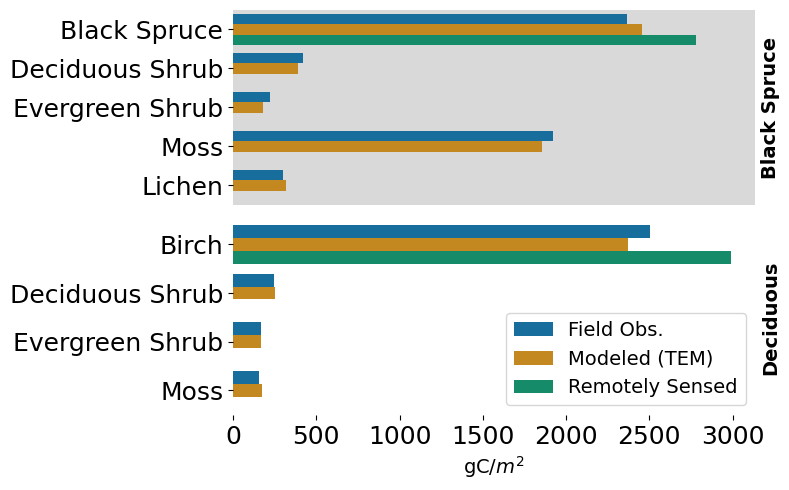

In [16]:
#TODO: propagate Error
fig, axes = plt.subplots(2, 1, figsize = (8,5), sharex=True)
sns.barplot(data = vegc_bs_comp, x='VEGC', y='pft', hue='type', orient='h', ax=axes[0], palette='colorblind')
sns.despine(left=True, bottom=True)

axes[0].set_facecolor('#d9d9d9')
axes[0].set_yticklabels(('Black Spruce', 'Deciduous Shrub', 'Evergreen Shrub', 'Moss', 'Lichen'), fontsize=18)
axes[0].set_ylabel('Black Spruce', fontweight='bold', fontsize=14)
axes[0].set_xlabel('')
axes[0].xaxis.set_ticks_position('none')
axes[0].yaxis.set_label_position('right')
axes[0].get_legend().remove()

#TODO: propagate Error
sns.barplot(data = vegc_br_comp.loc[vegc_br_comp['pft']!=0], x='VEGC', y='order', hue='type', orient='h', ax=axes[1], palette='colorblind')
sns.despine(left=True, bottom=True)

axes[1].set_yticklabels(('Birch', 'Deciduous Shrub', 'Evergreen Shrub', 'Moss'), fontsize=18)
plt.xticks(fontsize= 18)
axes[1].set_ylabel('Deciduous', fontweight='bold', fontsize=14)
axes[1].yaxis.set_label_position('right')
axes[1].set_xlabel('gC/$m^2$', fontsize=14)
axes[1].legend(title='', fontsize=14)

fig.tight_layout()
plt.savefig('output_figs/BONA/equillibrium_vegC.jpg', dpi=300)



In [17]:
vegc_br_comp

,pft,type,time,pftpart,y,x,VEGC,order
6,2,Field Obs.,35985,3,9,0,2506.480000,0
7,2,Modeled (TEM),35985,3,9,0,2370.659538,0
8,2,Remotely Sensed,35985,3,9,0,2987.690000,0
3,1,Field Obs.,35985,3,9,0,243.000000,1
4,1,Modeled (TEM),35985,3,9,0,253.416750,1
5,1,Remotely Sensed,35985,3,9,0,0.000000,1
12,4,Field Obs.,35985,3,9,0,170.000000,2
13,4,Modeled (TEM),35985,3,9,0,165.538290,2
14,4,Remotely Sensed,35985,3,9,0,0.000000,2
9,3,Field Obs.,35985,3,9,0,158.310000,3


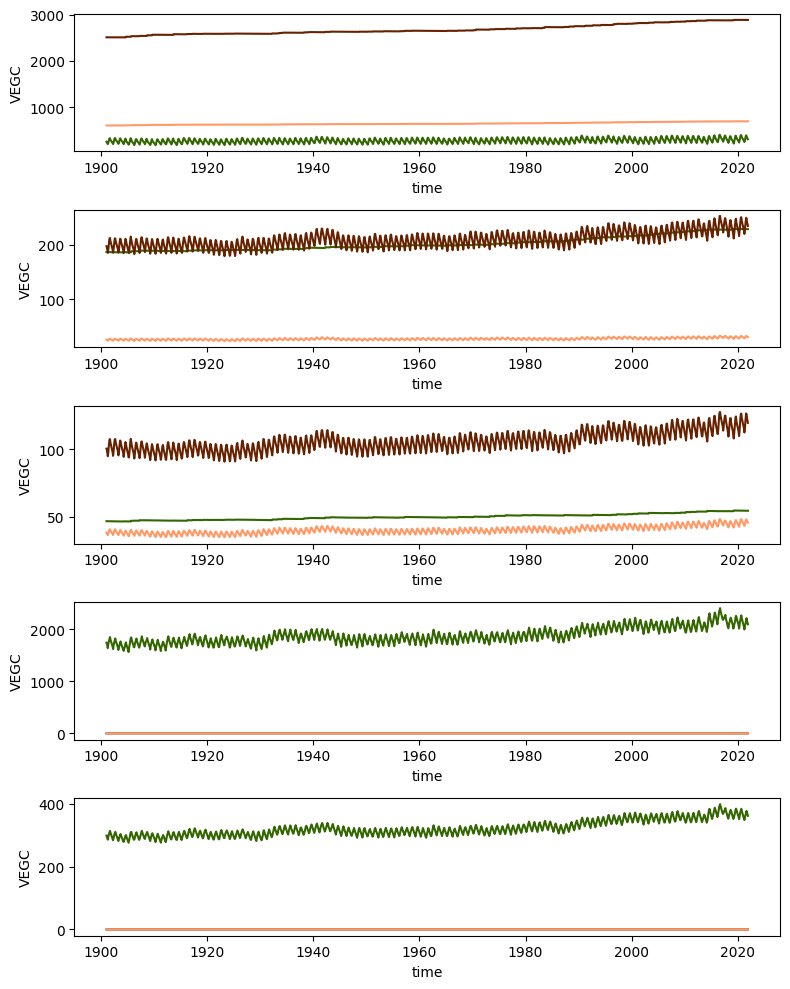

In [18]:
fig, axes = plt.subplots(5,1, figsize=(8,10))
palette=sns.color_palette(['#336600', '#662200', '#ff9966'])
sns.lineplot(data=vegc_bs_tr.loc[vegc_bs_tr['pft']==0], x='time', y='VEGC', hue='pftpart', ax=axes[0], legend=False, palette=palette)
sns.lineplot(data=vegc_bs_tr.loc[(vegc_bs_tr['pft']==1)], x='time', y='VEGC', hue='pftpart', ax=axes[1], legend=False, palette=palette)
sns.lineplot(data=vegc_bs_tr.loc[vegc_bs_tr['pft']==2], x='time', y='VEGC', hue='pftpart', ax=axes[2], legend=False, palette=palette)
sns.lineplot(data=vegc_bs_tr.loc[vegc_bs_tr['pft']==3], x='time', y='VEGC', hue='pftpart', ax=axes[3], legend=False, palette=palette)
sns.lineplot(data=vegc_bs_tr.loc[vegc_bs_tr['pft']==4], x='time', y='VEGC', hue='pftpart', ax=axes[4], legend=False, palette=palette)
fig.tight_layout()

## Compare soil carbon stocks

In [19]:
shlwc_bs_modeled = shlwc_bs_eq.loc[shlwc_bs_eq['time']==999]['SHLWC'].values[0]
deepc_bs_modeled = deepc_bs_eq.loc[deepc_bs_eq['time']==999]['DEEPC'].values[0]
shlwc_br_modeled = shlwc_br_eq.loc[shlwc_br_eq['time']==999]['SHLWC'].values[0]
deepc_br_modeled = deepc_br_eq.loc[deepc_br_eq['time']==999]['DEEPC'].values[0]

shlwc_bs_field = 2768
deepc_bs_field = 8765
shlwc_br_field = 728
deepc_br_field = 2307

In [20]:
df_org_c = pd.DataFrame({'stand': ['Black Spruce', 'Black Spruce', 'Deciduous', 'Deciduous',
                                   'Black Spruce', 'Black Spruce', 'Deciduous', 'Deciduous'],
                         'carbon_stock': ['Fibric', 'Humic', 'Fibric', 'Humic',
                                          'Fibric', 'Humic', 'Fibric', 'Humic'], 
                         'value': [shlwc_bs_field, deepc_bs_field, shlwc_br_field, deepc_br_field,
                                   shlwc_bs_modeled, deepc_bs_modeled, shlwc_br_modeled, deepc_br_modeled], 
                         'type': ['Field Obs.', 'Field Obs.', 'Field Obs.', 'Field Obs.',
                                  'Modeled (TEM)', 'Modeled (TEM)', 'Modeled (TEM)', 'Modeled (TEM)']})

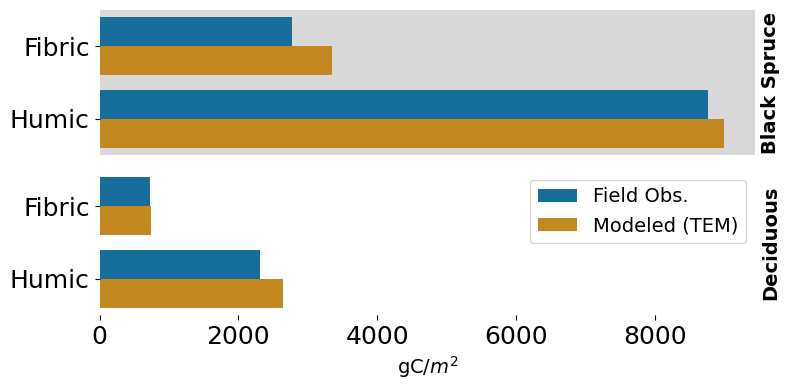

In [21]:
fig, axes = plt.subplots(2, 1, figsize = (8,4), sharex=True)

sns.barplot(data = df_org_c.loc[df_org_c['stand']=='Black Spruce'], x='value', y='carbon_stock', hue='type', orient='h', palette='colorblind', ax=axes[0])
sns.barplot(data = df_org_c.loc[df_org_c['stand']=='Deciduous'], x='value', y='carbon_stock', hue='type', orient='h', palette='colorblind', ax=axes[1])

axes[0].set_facecolor('#d9d9d9')
axes[0].set_yticklabels(('Fibric', 'Humic'), fontsize=18)
axes[0].set_xlabel('')
axes[0].xaxis.set_ticks_position('none')
axes[0].set_ylabel('Black Spruce', fontweight='bold', fontsize=14)
axes[0].yaxis.set_label_position('right')
axes[0].get_legend().remove()

axes[1].set_yticklabels(('Fibric', 'Humic'), fontsize=18)
axes[1].set_ylabel('Deciduous', fontweight='bold', fontsize=14)
axes[1].yaxis.set_label_position('right')
plt.xticks(fontsize= 18)
axes[1].set_xlabel('gC/$m^2$', fontsize=14)
plt.legend(title='', fontsize=14)
sns.despine(left=True, bottom=True)
fig.tight_layout()
plt.savefig('output_figs/BONA/equillibrium_soilC.jpg', dpi=300)

# Combined soil

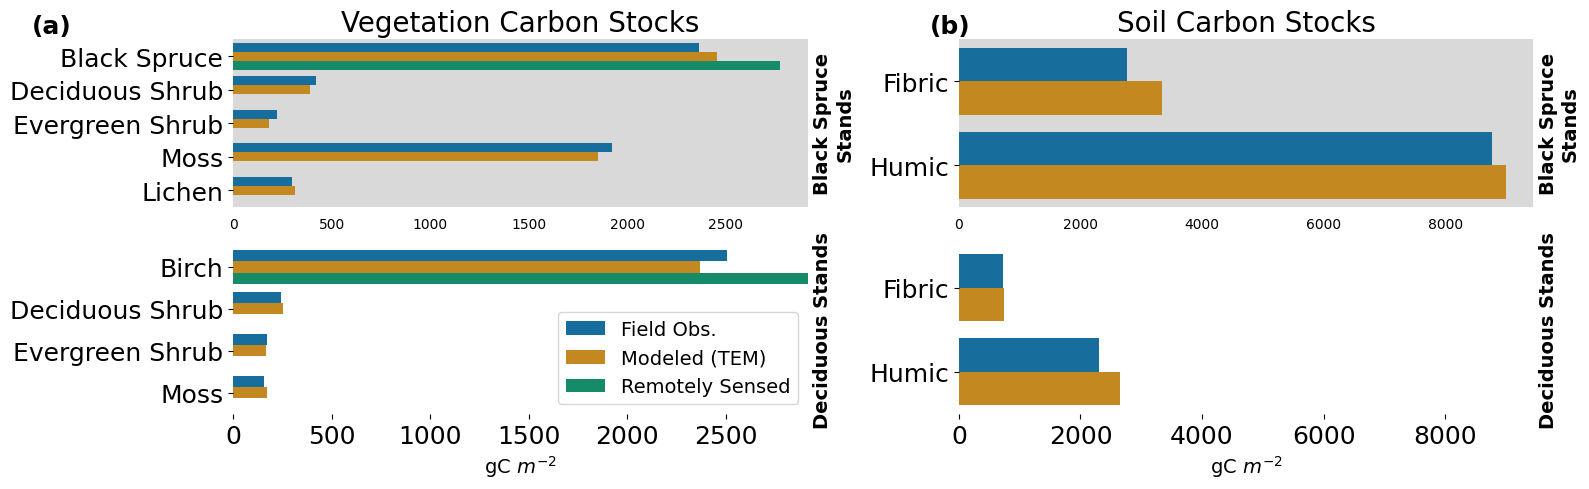

In [22]:
#TODO: propagate Error
fig, axes = plt.subplots(2, 2, figsize = (16,5))
sns.barplot(data = vegc_bs_comp, x='VEGC', y='pft', hue='type', orient='h', ax=axes[0,0], palette='colorblind')
sns.despine(left=True, bottom=True)

axes[0,0].set_facecolor('#d9d9d9')
axes[0,0].set_yticklabels(('Black Spruce', 'Deciduous Shrub', 'Evergreen Shrub', 'Moss', 'Lichen'), fontsize=18)
axes[0,0].set_ylabel('')
axes[0,0].set_xlabel('')
axes[0,0].xaxis.set_ticks_position('none')
axes[0,0].set_ylabel('Black Spruce\nStands', fontweight='bold', fontsize=14)
axes[0,0].yaxis.set_label_position('right')
axes[0,0].get_legend().remove()
axes[0,0].set_title('Vegetation Carbon Stocks', fontsize=20)
axes[0,0].text(-.35, 1.15, '(a)', horizontalalignment='left', verticalalignment='top', transform=axes[0,0].transAxes, fontsize=18, fontweight='bold')

#TODO: propagate Error
sns.barplot(data = vegc_br_comp.loc[vegc_br_comp['pft']!=0], x='VEGC', y='order', hue='type', orient='h', ax=axes[1,0], palette='colorblind')
sns.despine(left=True, bottom=True)

axes[1,0].set_yticklabels(('Birch', 'Deciduous Shrub', 'Evergreen Shrub', 'Moss'), fontsize=18)
axes[1,0].tick_params(axis='x', labelsize=18)
axes[1,0].set_ylabel('Deciduous Stands', fontweight='bold', fontsize=14)
axes[1,0].yaxis.set_label_position('right')
axes[1,0].set_xlabel('gC $m^{-2}$', fontsize=14)
axes[1,0].legend(title='', fontsize=14)
axes[1,0].sharex(axes[0,0])



sns.barplot(data = df_org_c.loc[df_org_c['stand']=='Black Spruce'], x='value', y='carbon_stock', hue='type', orient='h', palette='colorblind', ax=axes[0,1])
sns.barplot(data = df_org_c.loc[df_org_c['stand']=='Deciduous'], x='value', y='carbon_stock', hue='type', orient='h', palette='colorblind', ax=axes[1,1])

axes[0,1].set_title('Soil Carbon Stocks', fontsize=20)
axes[0,1].set_facecolor('#d9d9d9')
axes[0,1].set_yticklabels(('Fibric', 'Humic'), fontsize=18)
axes[0,1].set_xlabel('')
axes[0,1].xaxis.set_ticks_position('none')
axes[0,1].set_ylabel('Black Spruce\nStands', fontweight='bold', fontsize=14)
axes[0,1].yaxis.set_label_position('right')
axes[0,1].get_legend().remove()
axes[0,1].text(-.05, 1.15, '(b)', horizontalalignment='left', verticalalignment='top', transform=axes[0,1].transAxes, fontsize=18, fontweight='bold')

axes[1,1].set_yticklabels(('Fibric', 'Humic'), fontsize=18)
axes[1,1].set_ylabel('Deciduous Stands', fontweight='bold', fontsize=14)
axes[1,1].yaxis.set_label_position('right')
axes[1,1].tick_params(axis='x', labelsize=18)
axes[1,1].set_xlabel('gC $m^{-2}$', fontsize=14)
axes[1,1].get_legend().remove()
sns.despine(left=True, bottom=True)
axes[1,1].sharex(axes[0,1])

fig.tight_layout()
plt.savefig('output_figs/BONA/C_stocks_combined.jpg', dpi=300)


# Fluxes

In [23]:
BONA_EC_monthly = pd.read_csv('/data/comparison_data/BONA_monthly_fluxes.csv', parse_dates=['MM_YY'])


In [24]:
decid_color = '#6CB36B'
ever_color = '#1F6B39'

In [25]:
df_br

,date,GPP,NPP,RG,RG_root,RH,RM,RM_root,LWC_top,TLAYER_top,EET,TRANSPIRATION,LAI,RECO,NEE,year
0,1901-01-01,0.000000,-0.923042,0.000000,0.000000,0.003223,0.923042,0.117930,0.000000,-8.432560,0.529058,0.000000,9.979500,0.926265,0.926265,1901
1,1901-02-01,0.000000,-1.460946,0.000000,0.000000,0.004173,1.460946,0.184086,0.000000,-8.127632,0.414217,0.000000,9.751751,1.465119,1.465119,1901
2,1901-03-01,0.000000,-8.350694,0.000000,0.000000,0.005911,8.350694,1.033355,0.000000,-4.786202,3.629854,0.000000,9.554356,8.356605,8.356605,1901
3,1901-04-01,0.000000,-19.092427,0.000000,0.000000,0.008257,19.092427,2.296549,0.009191,-1.296199,81.997961,0.000000,9.367389,19.100684,19.100684,1901
4,1901-05-01,122.434699,79.250539,8.717560,0.375083,99.716498,34.466595,3.633923,0.280421,3.626784,47.518875,27.746388,9.176989,142.900653,20.465954,1901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,2021-08-01,160.531646,93.097327,10.240706,0.968393,17.040314,57.193609,6.370668,0.319092,11.035384,111.969573,56.361498,12.956523,84.474630,-76.057016,2021
1448,2021-09-01,76.773652,31.641286,3.808825,0.380968,81.933909,41.323537,5.328538,0.234681,5.296405,36.524511,26.964826,13.117349,127.066272,50.292619,2021
1449,2021-10-01,0.000000,-21.119227,0.000000,0.000000,3.910259,21.119227,2.860900,0.093338,-1.221168,4.667352,2.402428,12.803307,25.029485,25.029485,2021
1450,2021-11-01,0.000000,-2.939392,0.000000,0.000000,0.003691,2.939392,0.388794,0.000000,-8.333912,0.619631,0.000000,12.390432,2.943083,2.943083,2021


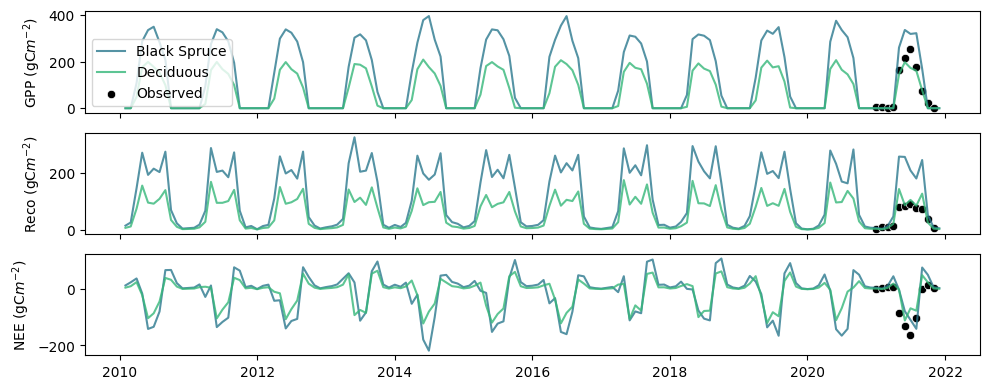

In [26]:
fig, axes=plt.subplots(3,1,figsize=(10,4), sharex=True)
sns.lineplot(data=df_bs.loc[(df_bs['date']>'2010-01-01') & (df_bs['date']<'2023-01-01')], x='date', y='GPP', label = 'Black Spruce', ax=axes[0], alpha=0.8, color='#2A788EFF')
sns.lineplot(data=df_bs.loc[(df_bs['date']>'2010-01-01') & (df_bs['date']<'2023-01-01')], x='date', y='RECO', label = 'Black Spruce', ax=axes[1], legend=False, alpha=0.8, color='#2A788EFF')
sns.lineplot(data=df_bs.loc[(df_bs['date']>'2010-01-01') & (df_bs['date']<'2023-01-01')], x='date', y='NEE', label = 'Black Spruce', ax=axes[2], legend=False, alpha=0.8, color='#2A788EFF')

sns.lineplot(data=df_br.loc[(df_br['date']>'2010-01-01') & (df_br['date']<'2023-01-01')], x='date', y='GPP', label = 'Deciduous', ax=axes[0], alpha=0.8, color='#35B779FF')
sns.lineplot(data=df_br.loc[(df_br['date']>'2010-01-01') & (df_br['date']<'2023-01-01')], x='date', y='RECO', label = 'Deciduous', ax=axes[1], legend=False, alpha=0.8, color='#35B779FF')
sns.lineplot(data=df_br.loc[(df_br['date']>'2010-01-01') & (df_br['date']<'2023-01-01')], x='date', y='NEE', label = 'Deciduous', ax=axes[2], legend=False, alpha=0.8, color='#35B779FF')

sns.scatterplot(data=BONA_EC_monthly.loc[BONA_EC_monthly['YR']==2021], x='MM_YY', y='GPP_gCm-2', ax=axes[0], label='Observed', color='black')
sns.scatterplot( x=BONA_EC_monthly.loc[BONA_EC_monthly['YR']==2021,'MM_YY'], y=BONA_EC_monthly.loc[BONA_EC_monthly['YR']==2021, 'GPP_gCm-2'] + BONA_EC_monthly.loc[BONA_EC_monthly['YR']==2021, 'NEE_gCm-2'], ax=axes[1], legend=False, color='black')
sns.scatterplot(data=BONA_EC_monthly.loc[BONA_EC_monthly['YR']==2021], x='MM_YY', y='NEE_gCm-2', ax=axes[2], legend=False, color='black')
plt.xlabel('')

axes[0].set_ylabel('GPP (gC$m^{-2}$)')
axes[1].set_ylabel('Reco (gC$m^{-2}$)')
axes[2].set_ylabel('NEE (gC$m^{-2}$)')
fig.tight_layout()
plt.savefig('output_figs/BONA/flux_hist.jpg', dpi=300)

In [27]:
BONA_soil_flux = pd.read_csv('/data/comparison_data/BONA_daily_averaged_soil_flux.csv', parse_dates=['MM_YY', 'Date'])

In [28]:
BONA_soil_flux.head()

,Unnamed: 0,Date,stand,Flux (gC m2 s-1),Flux (gC m2 m-1),month,year,MM_YY
0,0,2021-05-21,black_spruce,0.000025,66.273065,5,2021,2021-05-01
1,1,2021-05-21,deciduous,0.000028,74.698665,5,2021,2021-05-01
2,2,2021-05-21,mixed,0.000015,40.095081,5,2021,2021-05-01
3,3,2021-05-27,black_spruce,0.000021,55.853433,5,2021,2021-05-01
4,4,2021-05-27,deciduous,0.000019,50.025484,5,2021,2021-05-01


<AxesSubplot:xlabel='date', ylabel='Flux (gC m2 m-1)'>

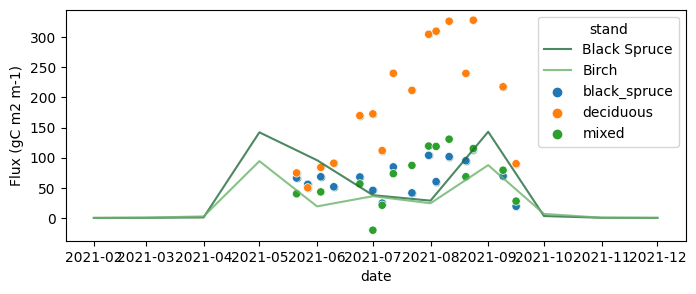

In [29]:
fig, axes=plt.subplots(figsize=(8,3))
bs_soil_resp = df_bs.loc[(df_bs['date']>'2021-01-01') & (df_bs['date']<'2023-01-01')]
br_soil_resp = df_br.loc[(df_br['date']>'2021-01-01') & (df_br['date']<'2023-01-01')]
sns.lineplot(data=bs_soil_resp, x='date', y=bs_soil_resp['RH']+bs_soil_resp['RM_root']+bs_soil_resp['RG_root'], label = 'Black Spruce', legend=False, alpha=0.8, color=ever_color)
sns.lineplot(data=br_soil_resp, x='date', y=br_soil_resp['RH']+br_soil_resp['RM_root']+br_soil_resp['RG_root'], label = 'Birch', legend=False, alpha=0.8, color=decid_color)
sns.scatterplot(data=BONA_soil_flux.loc[(BONA_soil_flux['year']==2021) & (BONA_soil_flux['stand']=='black_spruce')], x='Date', y='Flux (gC m2 m-1)', color=ever_color)
sns.scatterplot(data=BONA_soil_flux.loc[(BONA_soil_flux['year']==2021) & (BONA_soil_flux['stand']=='deciduous')], x='Date', y='Flux (gC m2 m-1)', color=decid_color)
sns.scatterplot(data=BONA_soil_flux.loc[BONA_soil_flux['year']==2021], x='Date', y='Flux (gC m2 m-1)', hue='stand')

<AxesSubplot:xlabel='date', ylabel='RH'>

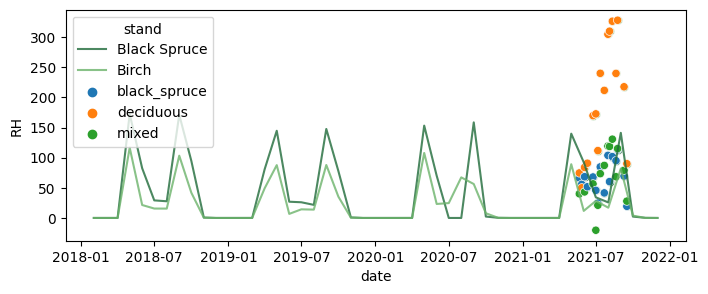

In [30]:
fig, axes=plt.subplots(figsize=(8,3))
bs_soil_resp = df_bs.loc[(df_bs['date']>'2018-01-01') & (df_bs['date']<'2022-01-01')]
br_soil_resp = df_br.loc[(df_br['date']>'2018-01-01') & (df_br['date']<'2022-01-01')]
sns.lineplot(data=bs_soil_resp, x='date', y=bs_soil_resp['RH'], label = 'Black Spruce', legend=False, alpha=0.8, color=ever_color)
sns.lineplot(data=br_soil_resp, x='date', y=br_soil_resp['RH'], label = 'Birch', legend=False, alpha=0.8, color=decid_color)
sns.scatterplot(data=BONA_soil_flux.loc[(BONA_soil_flux['year']==2021) & (BONA_soil_flux['stand']=='black_spruce')], x='Date', y='Flux (gC m2 m-1)', color=ever_color)
sns.scatterplot(data=BONA_soil_flux.loc[(BONA_soil_flux['year']==2021) & (BONA_soil_flux['stand']=='deciduous')], x='Date', y='Flux (gC m2 m-1)', color=decid_color)
sns.scatterplot(data=BONA_soil_flux.loc[BONA_soil_flux['year']==2021], x='Date', y='Flux (gC m2 m-1)', hue='stand')

In [31]:
rh_br_tr_layer

<xarray.Variable (time: 1452, layer: 22)>
array([[0.00000000e+00, 2.62037402e-03, 9.85988333e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.54761860e-03, 1.04015174e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.14852052e-03, 1.31103640e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 4.47498671e-03, 1.73597259e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.00621666e-03, 1.10721635e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.35911802e-03, 1.08678525e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])
Attributes:
    units:      g/m2/month
    long_name:  Heterotrophic respiration

<AxesSubplot:xlabel='date', ylabel='TLAYER_top'>

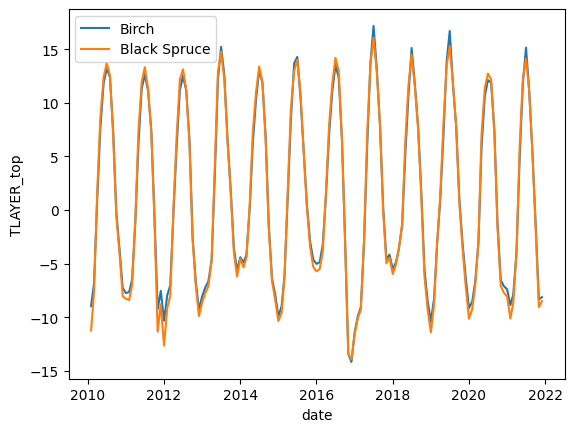

In [32]:
fig, ax = plt.subplots()

sns.lineplot(data=df_br.loc[(df_br['date']>'2010-01-01') & (df_br['date']<'2024-01-01')], x='date', y='TLAYER_top', label = 'Birch', ax=ax)
sns.lineplot(data=df_bs.loc[(df_bs['date']>'2010-01-01') & (df_bs['date']<'2024-01-01')], x='date', y='TLAYER_top', label = 'Black Spruce', ax=ax)


<AxesSubplot:xlabel='date', ylabel='LWC_top'>

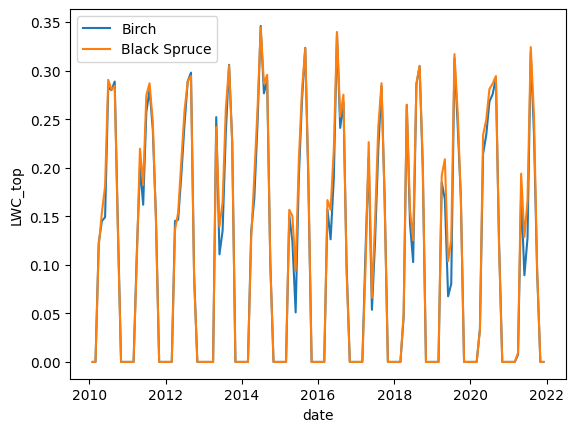

In [33]:
fig, ax = plt.subplots()

sns.lineplot(data=df_br.loc[(df_br['date']>'2010-01-01') & (df_br['date']<'2024-01-01')], x='date', y='LWC_top', label = 'Birch', ax=ax)
sns.lineplot(data=df_bs.loc[(df_bs['date']>'2010-01-01') & (df_bs['date']<'2024-01-01')], x='date', y='LWC_top', label = 'Black Spruce', ax=ax)


In [34]:
tlayer_bs_tr_df = pd.DataFrame(tlayer_bs_tr)
lwclayer_bs_tr_df = pd.DataFrame(lwclayer_bs_tr)

<AxesSubplot:ylabel='5'>

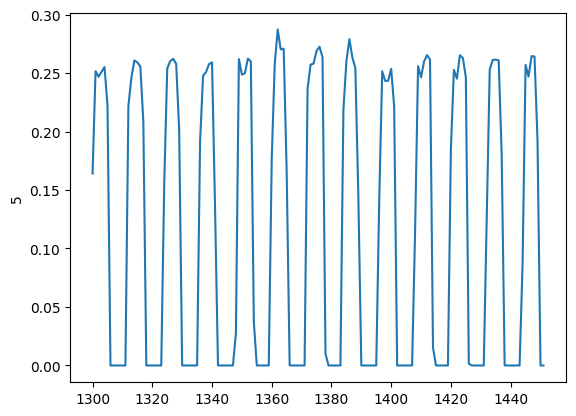

In [35]:
sns.lineplot(x=lwclayer_bs_tr_df[1300:].index, y=lwclayer_bs_tr_df[1300:][5])
#sns.lineplot(x=lwclayer_bs_tr_df[1200:].index, y=lwclayer_bs_tr_df[1200:][1])
#sns.lineplot(x=lwclayer_bs_tr_df[1200:].index, y=lwclayer_bs_tr_df[1200:][2])
#sns.lineplot(x=lwclayer_bs_tr_df[1200:].index, y=lwclayer_bs_tr_df[1200:][3])
#sns.lineplot(x=lwclayer_bs_tr_df[1200:].index, y=lwclayer_bs_tr_df[1200:][4])
#sns.lineplot(x=lwclayer_bs_tr_df[1200:].index, y=lwclayer_bs_tr_df[1200:][5])

<AxesSubplot:ylabel='0'>

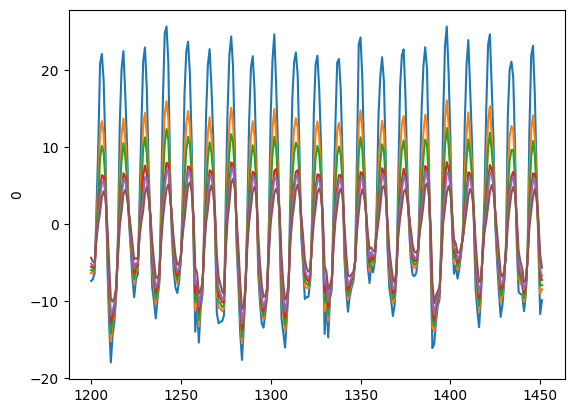

In [36]:

sns.lineplot(x=tlayer_bs_tr_df[1200:].index, y=tlayer_bs_tr_df[1200:][0])
sns.lineplot(x=tlayer_bs_tr_df[1200:].index, y=tlayer_bs_tr_df[1200:][1])
sns.lineplot(x=tlayer_bs_tr_df[1200:].index, y=tlayer_bs_tr_df[1200:][2])
sns.lineplot(x=tlayer_bs_tr_df[1200:].index, y=tlayer_bs_tr_df[1200:][3])
sns.lineplot(x=tlayer_bs_tr_df[1200:].index, y=tlayer_bs_tr_df[1200:][4])
sns.lineplot(x=tlayer_bs_tr_df[1200:].index, y=tlayer_bs_tr_df[1200:][5])

In [37]:
bs_soil_resp

,date,GPP,NPP,RG,RG_root,RH,RM,RM_root,LWC_top,TLAYER_top,EET,TRANSPIRATION,LAI,RECO,NEE,year
1405,2018-02-01,0.000000,-10.717031,0.000000,0.000000,0.012375,10.717031,0.194487,0.000000,-5.087199,3.570380,0.000000,79.805413,10.729406,10.729406,2018
1406,2018-03-01,0.000000,-27.296324,0.000000,0.000000,0.013656,27.296324,0.500797,0.000000,-3.557546,6.057025,0.000000,78.592259,27.309980,27.309980,2018
1407,2018-04-01,56.799491,-1.589211,2.101439,0.020302,0.015435,56.287271,1.041417,0.050045,-1.275247,115.934121,0.279397,77.091197,58.404145,1.604654,2018
1408,2018-05-01,296.232921,173.205819,19.052639,0.334449,172.546583,103.974465,1.963562,0.264843,6.379634,54.361638,31.226668,76.574743,295.573687,-0.659234,2018
1409,2018-06-01,316.086154,157.872639,17.365989,0.429254,82.432039,140.847529,2.812842,0.156161,11.694999,98.612477,72.353222,79.073230,240.645557,-75.440597,2018
1410,2018-07-01,310.645255,133.599123,14.695904,0.357445,29.161295,162.350246,3.307011,0.125200,14.490422,108.898971,77.574806,80.514070,206.207444,-104.437811,2018
1411,2018-08-01,292.005428,138.464588,15.231104,0.289745,27.688501,138.309727,2.637654,0.286674,11.486912,95.217321,46.929572,81.499398,181.229333,-110.776095,2018
1412,2018-09-01,201.557525,77.750993,8.552609,0.109669,171.074051,115.253941,2.019813,0.304927,7.589228,52.144327,24.038345,83.150961,294.880602,93.323077,2018
1413,2018-10-01,53.918666,-14.963514,1.431517,0.030435,94.674480,67.450668,1.176775,0.206200,1.384935,10.464043,4.754960,84.011724,163.556665,109.637999,2018
1414,2018-11-01,0.000000,-16.444850,0.000000,0.000000,0.686974,16.444850,0.290033,0.000000,-6.194427,3.669773,0.000000,83.156556,17.131824,17.131824,2018


<AxesSubplot:xlabel='date', ylabel='LWC_top'>

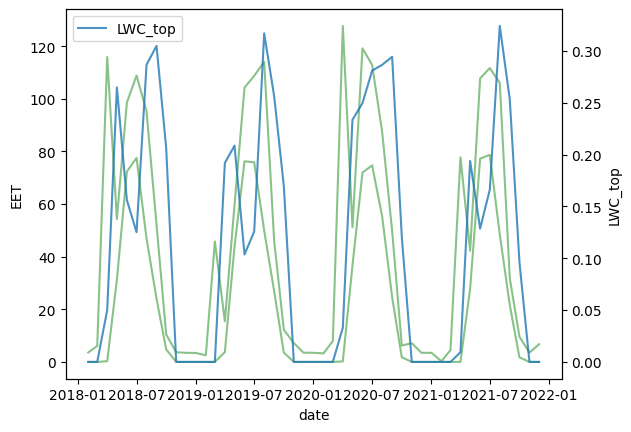

In [38]:
fig, ax = plt.subplots()
ax2=ax.twinx()
sns.lineplot(data=bs_soil_resp, x='date', y=bs_soil_resp['EET'], label = 'RH', legend=False, alpha=0.8, color=decid_color, ax = ax)
sns.lineplot(data=bs_soil_resp, x='date', y=bs_soil_resp['TRANSPIRATION'], label = 'RH', legend=False, alpha=0.8, color=decid_color, ax = ax)
sns.lineplot(data=bs_soil_resp, x='date', y=bs_soil_resp['LWC_top'], label = 'LWC_top', alpha=0.8, ax = ax2)

<AxesSubplot:xlabel='date', ylabel='LAI'>

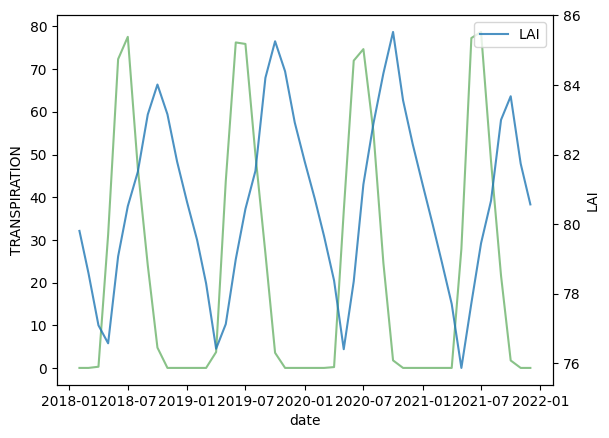

In [39]:
fig, ax = plt.subplots()
ax2=ax.twinx()
sns.lineplot(data=bs_soil_resp, x='date', y=bs_soil_resp['TRANSPIRATION'], label = 'Trans', legend=False, alpha=0.8, color=decid_color, ax = ax)
sns.lineplot(data=bs_soil_resp, x='date', y=bs_soil_resp['LAI'], label = 'LAI', alpha=0.8, ax = ax2)

<AxesSubplot:xlabel='date', ylabel='LAI'>

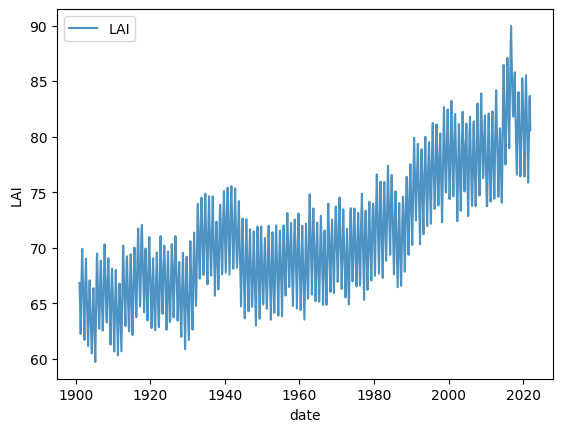

In [40]:
sns.lineplot(data=df_bs, x='date', y=df_bs['LAI'], label = 'LAI', alpha=0.8)

<AxesSubplot:>

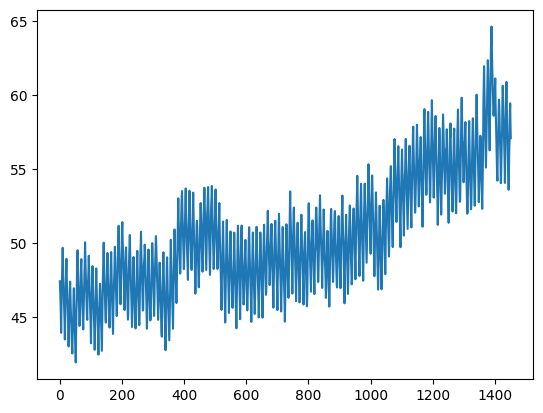

In [41]:
sns.lineplot(x=np.arange(len(lai_bs_tr)), y=lai_bs_tr[:,3])

(array([17532., 17713., 17897., 18078., 18262., 18444., 18628., 18809.,
        18993.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

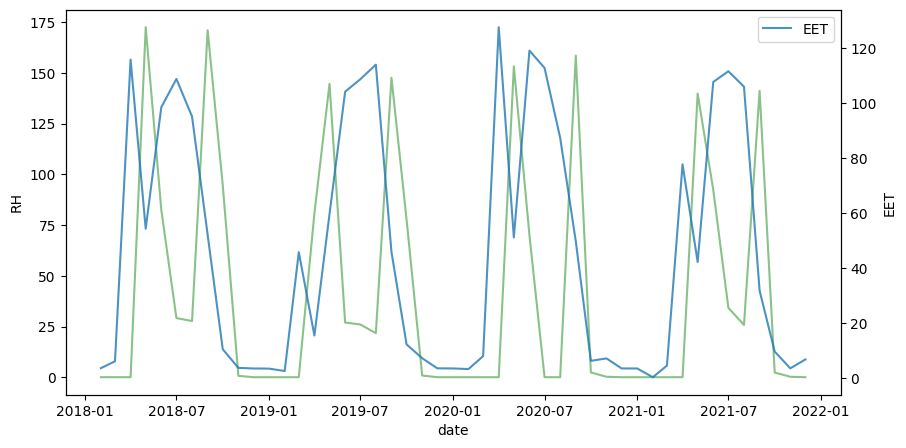

In [42]:
fig, ax = plt.subplots(figsize=(10,5))
ax2=ax.twinx()
sns.lineplot(data=bs_soil_resp, x='date', y=bs_soil_resp['RH'], label = 'RH', legend=False, alpha=0.8, color=decid_color, ax = ax)
sns.lineplot(data=bs_soil_resp, x='date', y=bs_soil_resp['EET'], label = 'EET', alpha=0.8, ax = ax2)
plt.xticks(rotation = 90)

<AxesSubplot:xlabel='time', ylabel='LTRFALC'>

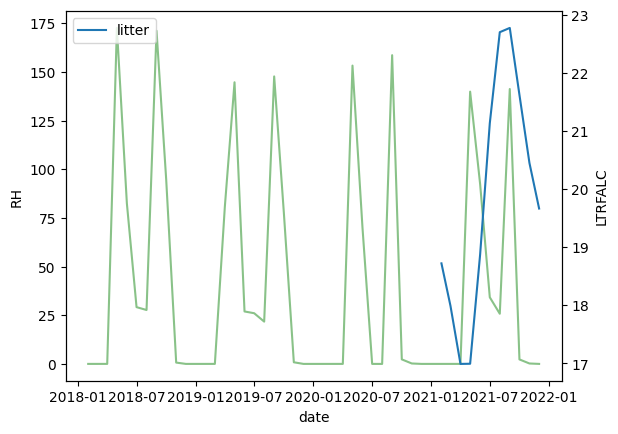

In [43]:

fig, ax = plt.subplots()
ax2=ax.twinx()
sns.lineplot(data=bs_soil_resp, x='date', y=bs_soil_resp['RH'], label = 'RH', legend=False, alpha=0.8, color=decid_color, ax = ax)
sns.lineplot(data=ltrfalc_bs_tr.loc[ltrfalc_bs_tr['time']>'2021-01-01'], x='time', y='LTRFALC', ax=ax2, label='litter')

<AxesSubplot:xlabel='time', ylabel='SHLWC'>

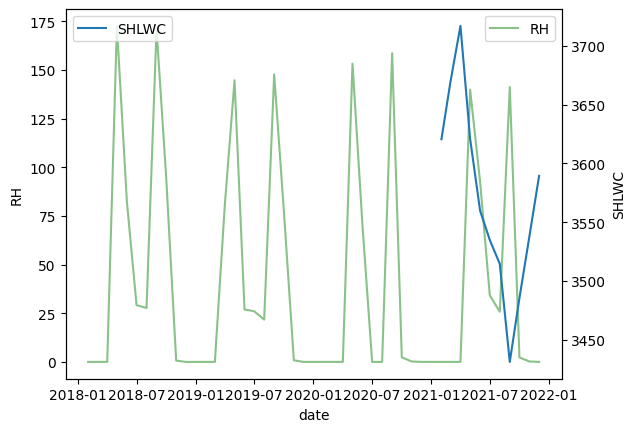

In [44]:
fig, ax = plt.subplots()
ax2=ax.twinx()
sns.lineplot(data=bs_soil_resp, x='date', y=bs_soil_resp['RH'], label = 'RH', alpha=0.8, color=decid_color, ax = ax)
sns.lineplot(data=shlwc_bs_tr.loc[shlwc_bs_tr['time']>'2021-01-01'], x='time', y='SHLWC', ax=ax2, label='SHLWC')

<AxesSubplot:xlabel='date', ylabel='RH'>

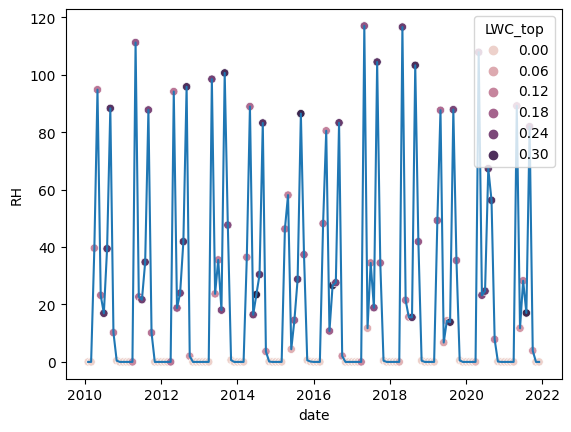

In [45]:
sns.lineplot(data=df_br.loc[(df_br['date']>'2010-01-01') & (df_br['date']<'2024-01-01')], x='date', y='RH')
sns.scatterplot(data=df_br.loc[(df_br['date']>'2010-01-01') & (df_br['date']<'2024-01-01')], x='date', y='RH', hue = 'LWC_top')

<AxesSubplot:xlabel='LWC_top', ylabel='RH'>

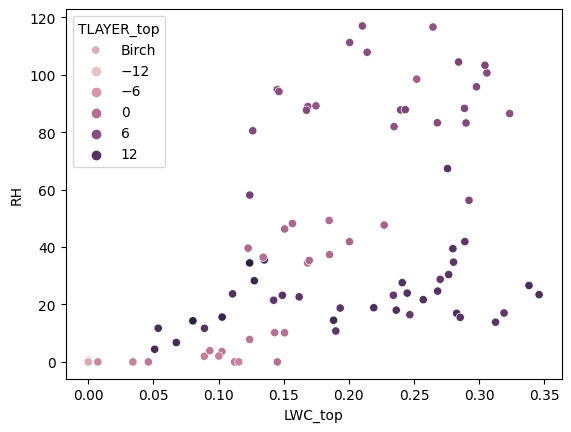

In [46]:
sns.scatterplot(data=df_br.loc[(df_br['date']>'2010-01-01') & (df_br['date']<'2024-01-01')], x='LWC_top', y='RH', label = 'Birch', hue='TLAYER_top')

<AxesSubplot:xlabel='TLAYER_top', ylabel='RH'>

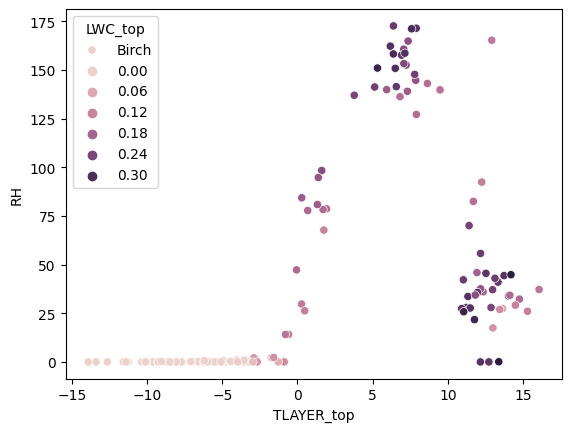

In [47]:
sns.scatterplot(data=df_bs.loc[(df_bs['date']>'2010-01-01') & (df_bs['date']<'2024-01-01')], x='TLAYER_top', y='RH', label = 'Birch', hue='LWC_top')

<AxesSubplot:xlabel='LWC_top', ylabel='RH'>

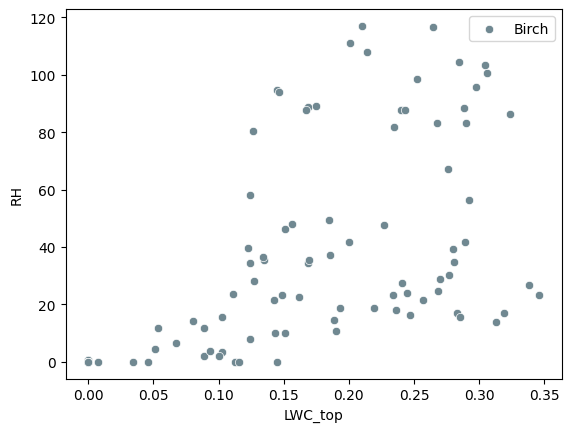

In [48]:
sns.scatterplot(data=df_br.loc[(df_br['date']>'2010-01-01') & (df_br['date']<'2024-01-01')], x='LWC_top', y='RH', label = 'Birch', color='#708891')

In [49]:
df_bs_yearly['CMT'] = 'Black Spruce'
df_br_yearly['CMT'] = 'Deciduous'

In [50]:
df_yearly=pd.concat([df_bs_yearly, df_br_yearly]).reset_index()

In [51]:
df_yearly_melt = df_yearly[['year', 'GPP', 'RECO', 'NEE', 'CMT']].melt(id_vars=['year', 'CMT'], value_vars=['GPP', 'RECO', 'NEE', 'CMT'])
df_yearly_melt.loc[df_yearly_melt['variable']=='RECO', 'variable'] = 'Reco'
df_yearly_melt['order'] = 0
df_yearly_melt.loc[df_yearly_melt['variable']=='Reco', 'order'] = 1
df_yearly_melt.loc[df_yearly_melt['variable']=='NEE', 'order'] = 2
df_yearly_melt = df_yearly_melt.sort_values(by='order')

In [52]:
df_yearly_melt.head()

,year,CMT,variable,value,order
0,1901,Black Spruce,GPP,1229.095893,0
154,1934,Deciduous,GPP,741.529777,0
155,1935,Deciduous,GPP,650.072196,0
156,1936,Deciduous,GPP,704.113416,0
157,1937,Deciduous,GPP,677.377701,0


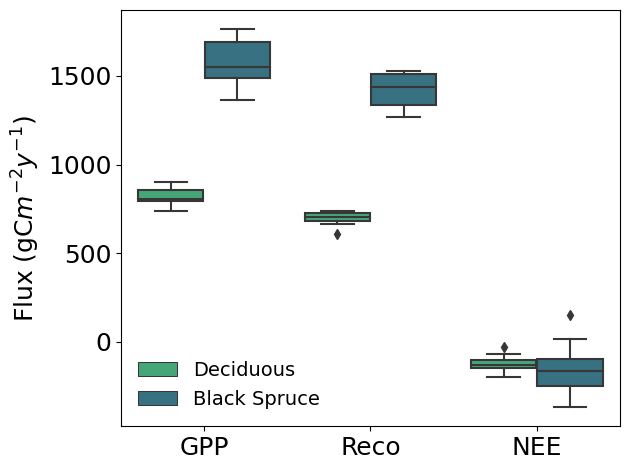

In [53]:
pal = sns.color_palette(['#35B779FF', '#2A788EFF'])

fig, ax = plt.subplots()
sns.boxplot(data = df_yearly_melt.loc[df_yearly_melt['year']>=2010], x='variable', y='value', hue='CMT', palette = pal)

ax.set_ylabel('Flux (gC$m^{-2}$$y^{-1}$)', fontsize=18)
ax.set_xlabel('')
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.legend(title='', fontsize=14, frameon=False)
fig.tight_layout()
plt.savefig('output_figs/BONA/flux_boxplot.jpg', dpi=300)

In [54]:
df_yearly_melt.groupby(by=['CMT', 'variable']).mean()

year        value  order
CMT          variable                            
Black Spruce GPP       1961.0  1365.797478    0.0
             NEE       1961.0  -121.931045    2.0
             Reco      1961.0  1243.866433    1.0
Deciduous    GPP       1961.0   736.237308    0.0
             NEE       1961.0  -104.006066    2.0
             Reco      1961.0   632.231243    1.0

In [55]:
df_yearly_melt.groupby(by=['CMT', 'variable']).std()

year       value  order
CMT          variable                              
Black Spruce GPP       35.073732  140.430671    0.0
             NEE       35.073732   99.815367    0.0
             Reco      35.073732  119.050899    0.0
Deciduous    GPP       35.073732   65.832907    0.0
             NEE       35.073732   48.480101    0.0
             Reco      35.073732   54.716790    0.0

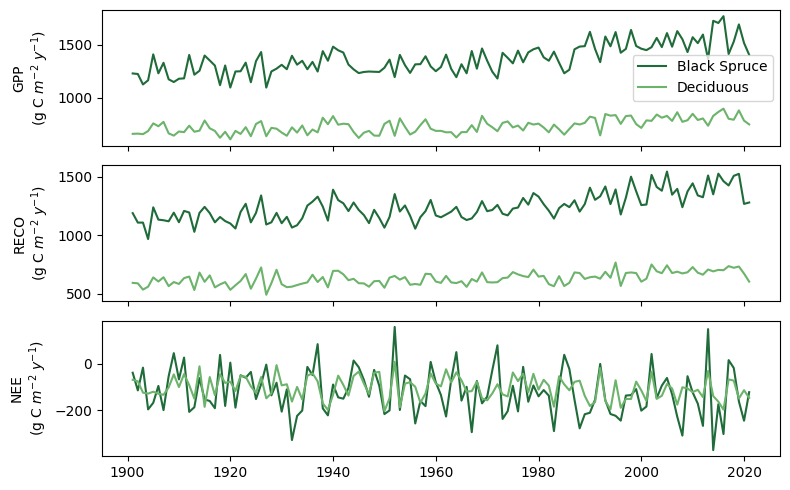

In [56]:
#sns.set_palette(sns.color_palette("Greys",2))
fig, axes=plt.subplots(3,1,figsize=(8,5))
sns.lineplot(data=df_bs_yearly, x='year', y='GPP', ax=axes[0], label = 'Black Spruce', color=ever_color)
sns.lineplot(data=df_br_yearly, x='year', y='GPP', ax=axes[0], label = 'Deciduous', color=decid_color)
sns.lineplot(data=df_bs_yearly, x='year', y='RECO', ax=axes[1], color=ever_color)
sns.lineplot(data=df_br_yearly, x='year', y='RECO', ax=axes[1], color=decid_color)
sns.lineplot(data=df_bs_yearly, x='year', y='NEE', ax=axes[2], color=ever_color)
sns.lineplot(data=df_br_yearly, x='year', y='NEE', ax=axes[2], color=decid_color)

axes[0].xaxis.set_tick_params(labelbottom=False)
axes[1].xaxis.set_tick_params(labelbottom=False)
axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[0].set_ylabel('GPP\n(g C $m^{-2}$ $y^{-1}$)')
axes[1].set_ylabel('RECO\n(g C $m^{-2}$ $y^{-1}$)')
axes[2].set_ylabel('NEE\n(g C $m^{-2}$ $y^{-1}$)')
plt.xlabel('')
fig.tight_layout()
plt.savefig('output_figs/BONA/yearly_fluxes.jpg', dpi=300)


In [57]:
bins=['2000-2009', '2010-2019', '2020-2029', '2030-2039', '2040-2049', 
      '2050-2059', '2060-2069', '2070-2079', '2080-2089', '2090-2100']
df_bs_recent=df_bs_yearly.loc[df_bs_yearly.index>=2000]
df_br_recent=df_br_yearly.loc[df_br_yearly.index>=2000]

df_bs_recent['bin_index']= ((df_bs_recent.index.astype(int)-2000)/10).astype(int).to_list()
df_br_recent['bin_index']= ((df_br_recent.index.astype(int)-2000)/10).astype(int).to_list()

df_bs_recent.loc[df_bs_recent.index==2100, 'bin_index']=9
df_br_recent.loc[df_bs_recent.index==2100, 'bin_index']=9

/tmp/ipykernel_2080/1446786587.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bs_recent['bin_index']= ((df_bs_recent.index.astype(int)-2000)/10).astype(int).to_list()
/tmp/ipykernel_2080/1446786587.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_br_recent['bin_index']= ((df_br_recent.index.astype(int)-2000)/10).astype(int).to_list()


In [58]:
df_bs_recent['stand'] = 'Black Spruce'
df_br_recent['stand'] = 'Birch'
df_recent=pd.concat([df_bs_recent, df_br_recent])

/tmp/ipykernel_2080/3216363827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bs_recent['stand'] = 'Black Spruce'
/tmp/ipykernel_2080/3216363827.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_br_recent['stand'] = 'Birch'


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of ticklabels (10).

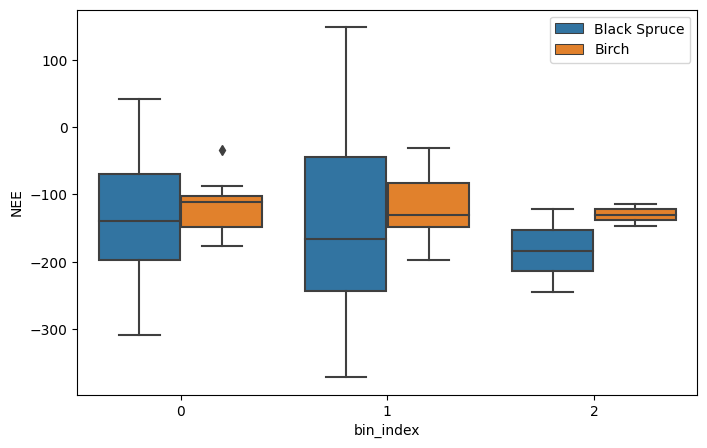

In [59]:
fig, ax=plt.subplots(figsize=(8,5))
#sns.set_palette(sns.color_palette(['#708891', '#E0DAD0']))
sns.boxplot(data=df_recent, x = 'bin_index', y = 'NEE', hue='stand')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[:], labels=labels[:])
ax.set_xticklabels(bins)
plt.xticks(rotation = 45)
ax.set_ylabel('NEE\n(g C $m^{-2}$ $y^{-1}$)')
ax.set_xlabel('')
fig.tight_layout()
plt.savefig('BONA_carbon_b.jpg', dpi=300)
plt.show()

In [ ]:
fig, ax=plt.subplots(figsize=(8,5))
#sns.set_palette(sns.color_palette(['#708891', '#E0DAD0']))
sns.boxplot(data=df_recent, x = 'bin_index', y = 'NEE', hue='stand')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[:], labels=labels[:])
ax.set_xticklabels(bins)
plt.xticks(rotation = 45)
ax.set_ylabel('NEE\n(g C $m^{-2}$ $y^{-1}$)')
ax.set_xlabel('')
fig.tight_layout()
plt.savefig('BONA_carbon_b.jpg', dpi=300)
plt.show()

In [ ]:
sns.lineplot(data=df_bs_yearly[(df_bs_yearly.index>2010) & (df_bs_yearly.index<2020)], x='year', y='GPP')
sns.lineplot(data=df_br_yearly[(df_br_yearly.index>2010) & (df_br_yearly.index<2020)], x='year', y='GPP')
sns.lineplot(data=df_bs_yearly[(df_bs_yearly.index>2010) & (df_bs_yearly.index<2020)], x='year', y='RH')
sns.lineplot(data=df_br_yearly[(df_br_yearly.index>2010) & (df_br_yearly.index<2020)], x='year', y='RH')

In [ ]:
a = 'sdaf/adfadsfa/asdfa/fs.tif'
b = '/'.join(a.split('/')[:-1]) + '/fused_landcover.tif'
b